# Virtual Internship Home Credit Indonesia

#### In Colaboration with Rakamin Academy

- Name      : Trilaksono Buwono Subiantoro
- LinkedIn  : https://www.linkedin.com/in/trilaksono-subiantoro-36307a226/
- Github    : https://github.com/TrilaksonoBS

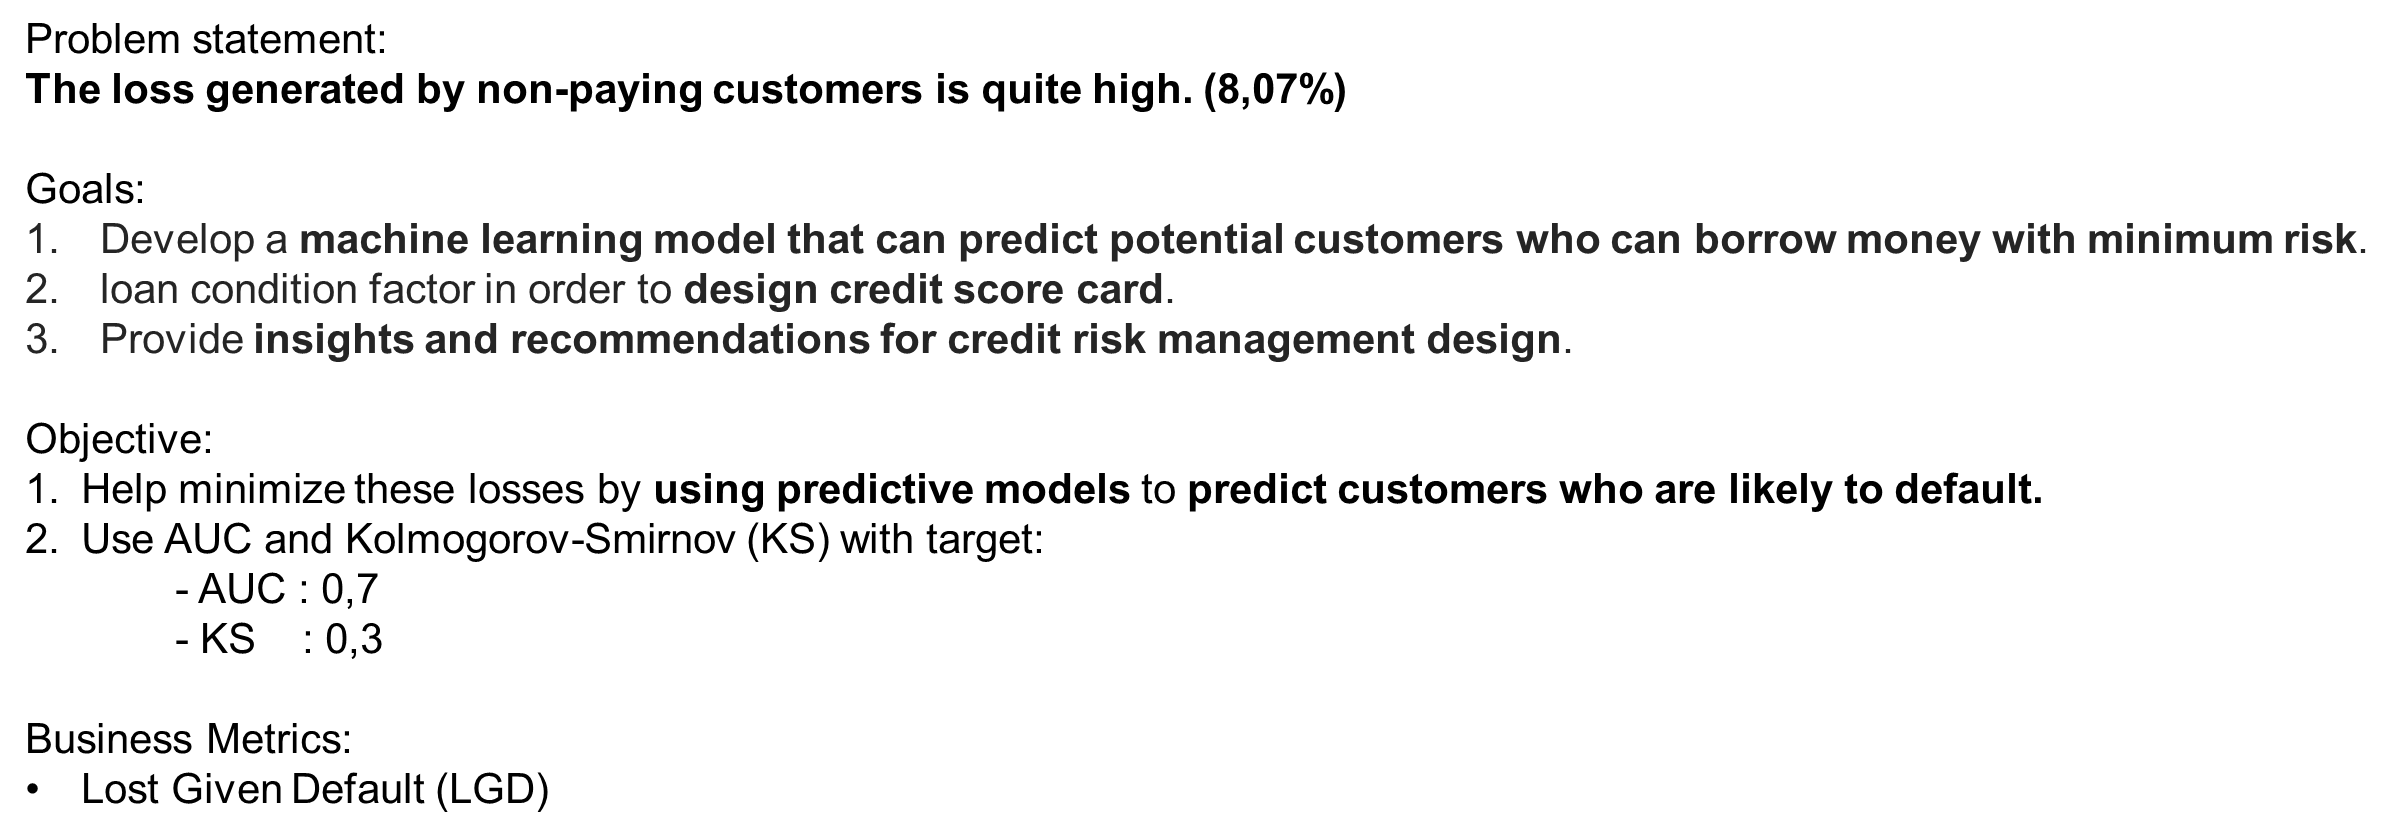

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
pip install imblearn --user

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis

## Descriptive Analysis

In [4]:
df1 = pd.read_csv('C:/Users/LENOVO/Downloads/CV KERJA/[Trilaksono Buwono Subiantoro]_VIX_Home Credit/Dataset/application_train.csv')

In [5]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df1.info(verbose=True, null_counts=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\95206278.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df1.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Data Preparation

### Extracting REGISTRATION DATE and YEAR REGISTRATION

In [7]:
df1['DAYS_REGISTRATION'].value_counts()

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [8]:
df1['DATE_REGISTRATION'] = pd.to_datetime("today") + pd.to_timedelta(df1['DAYS_REGISTRATION'], unit='D')

In [9]:
df1['DATE_REGISTRATION'].head()

0   2012-08-28 17:24:59.291349
1   2019-05-26 17:24:59.291349
2   2010-12-25 17:24:59.291349
3   1995-09-22 17:24:59.291349
4   2010-11-04 17:24:59.291349
Name: DATE_REGISTRATION, dtype: datetime64[ns]

In [10]:
df1['YEAR_REGISTRATION'] = pd.DatetimeIndex(df1['DATE_REGISTRATION']).year

In [11]:
df1['YEAR_REGISTRATION'].head()

0    2012
1    2019
2    2010
3    1995
4    2010
Name: YEAR_REGISTRATION, dtype: int64

### Extract Age and Grouping Age by Category

In [12]:
df1['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [13]:
df1['AGE'] = df1['DAYS_BIRTH']/-360
decimals = 0
df1['AGE'] = df1['AGE'].apply(lambda x: round(x, decimals))

print(f'''Min value Age Column:''')
print(df1['AGE'].min())

print(f'''Max value Age Column:''')
print(df1['AGE'].max())

print(f'''Value count Age Column:''')
print(df1['AGE'].value_counts())

Min value Age Column:
21.0
Max value Age Column:
70.0
Value count Age Column:
38.0    8722
40.0    8714
39.0    8697
41.0    8486
37.0    8474
28.0    8419
42.0    8352
32.0    8335
44.0    8228
43.0    8131
29.0    7839
33.0    7777
36.0    7694
45.0    7667
31.0    7648
34.0    7622
30.0    7579
35.0    7536
55.0    7360
46.0    7220
54.0    7219
47.0    7215
48.0    6982
56.0    6853
58.0    6840
49.0    6834
57.0    6648
53.0    6598
50.0    6578
52.0    6497
51.0    6487
60.0    6480
61.0    6386
59.0    6133
62.0    5671
64.0    5378
63.0    5272
27.0    4916
65.0    4890
26.0    4122
66.0    4049
25.0    3907
24.0    3877
23.0    3289
67.0    2520
68.0    1835
69.0    1570
22.0    1467
70.0     268
21.0     230
Name: AGE, dtype: int64


In [14]:
def age_category(age):
    if age < 20:
        return 'Late Ten'
    elif age >= 20 and age < 30:
        return 'Twenty'
    elif age >= 30 and age < 40:
        return 'Thirty'
    elif age >= 40 and age < 50:
        return 'Fourty'
    elif age >= 50 and age < 60:
        return 'Fifty'
    else:
        return 'Above Sixty'

df1['AGE_CATEGORY'] = df1['AGE'].apply(age_category)

In [15]:
print(f'''Min value Age Category Column:''')
print(df1['AGE_CATEGORY'].min())

print(f'''Max value Age Category Column:''')
print(df1['AGE_CATEGORY'].max())

print(f'''Value count Age Column:''')
print(df1['AGE_CATEGORY'].value_counts())

Min value Age Category Column:
Above Sixty
Max value Age Category Column:
Twenty
Value count Age Column:
Thirty         80084
Fourty         77829
Fifty          67213
Above Sixty    44319
Twenty         38066
Name: AGE_CATEGORY, dtype: int64


### Grouping Income Category into LOW, MID and HIGH

In [16]:
df1['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [17]:
def income_category(income):
    if income < 112500:
        return 'Low Income'
    elif income >= 112500 and income < 202500:
        return 'Mid Income'
    else:
        return 'High Income'

df1['AMT_INCOME_CAT'] = df1['AMT_INCOME_TOTAL'].apply(income_category)

In [18]:
df1['AMT_INCOME_CAT'].value_counts()

Mid Income     150073
High Income     87879
Low Income      69559
Name: AMT_INCOME_CAT, dtype: int64

## Univariate, Bivariate, & Multivariate Analysis

['DAYS_BIRTH' 'DAYS_ID_PUBLISH' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'REG_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'DAYS_LAST_PHONE_CHANGE' 'AGE'
 'CODE_GENDER' 'NAME_EDUCATION_TYPE' 'NAME_INCOME_TYPE_Pensioner'
 'NAME_INCOME_TYPE_Working' 'AGE_CATEGORY_Twenty']

['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','EMERGENCYSTATE_MODE','NAME_EDUCATION_TYPE','AMT_INCOME_CAT','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY','NAME_HOUSING_TYPE']

In [19]:
nums = [key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['float64', 'int64']]
cats = [key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['object']]

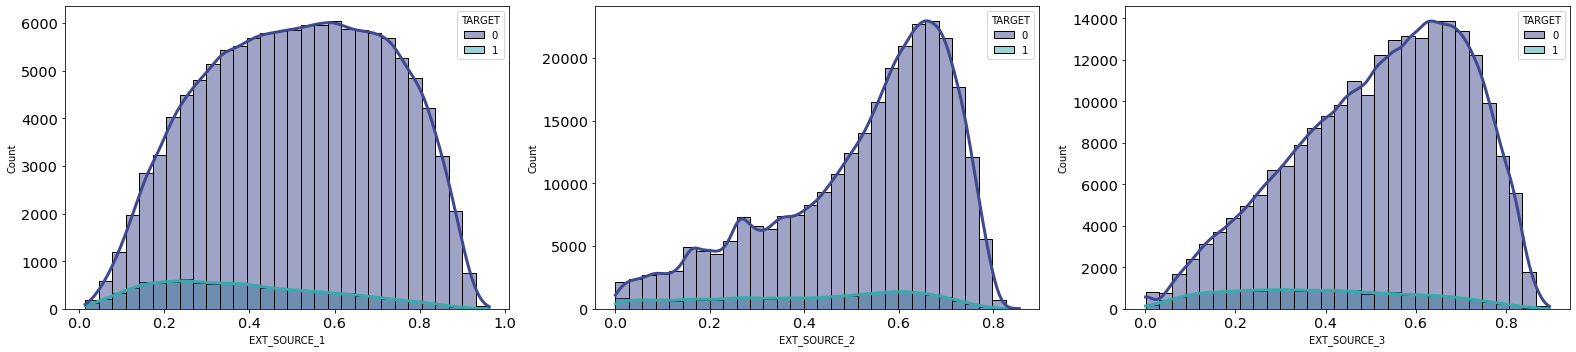

In [20]:
# plt.subplot(nrows, ncols, plot_number)
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.histplot(x=df1['EXT_SOURCE_1'],data=df1,hue=df1['TARGET'],bins=30,palette='mako',kde=True)
plt.subplot(1,3,2)
sns.histplot(x=df1['EXT_SOURCE_2'],data=df1,hue=df1['TARGET'],bins=30,palette='mako',kde=True)
plt.subplot(1,3,3)
sns.histplot(x=df1['EXT_SOURCE_3'],data=df1,hue=df1['TARGET'],bins=30,palette='mako',kde=True)
plt.tight_layout()
plt.savefig('ext source.png',dpi='figure',transparent=True)

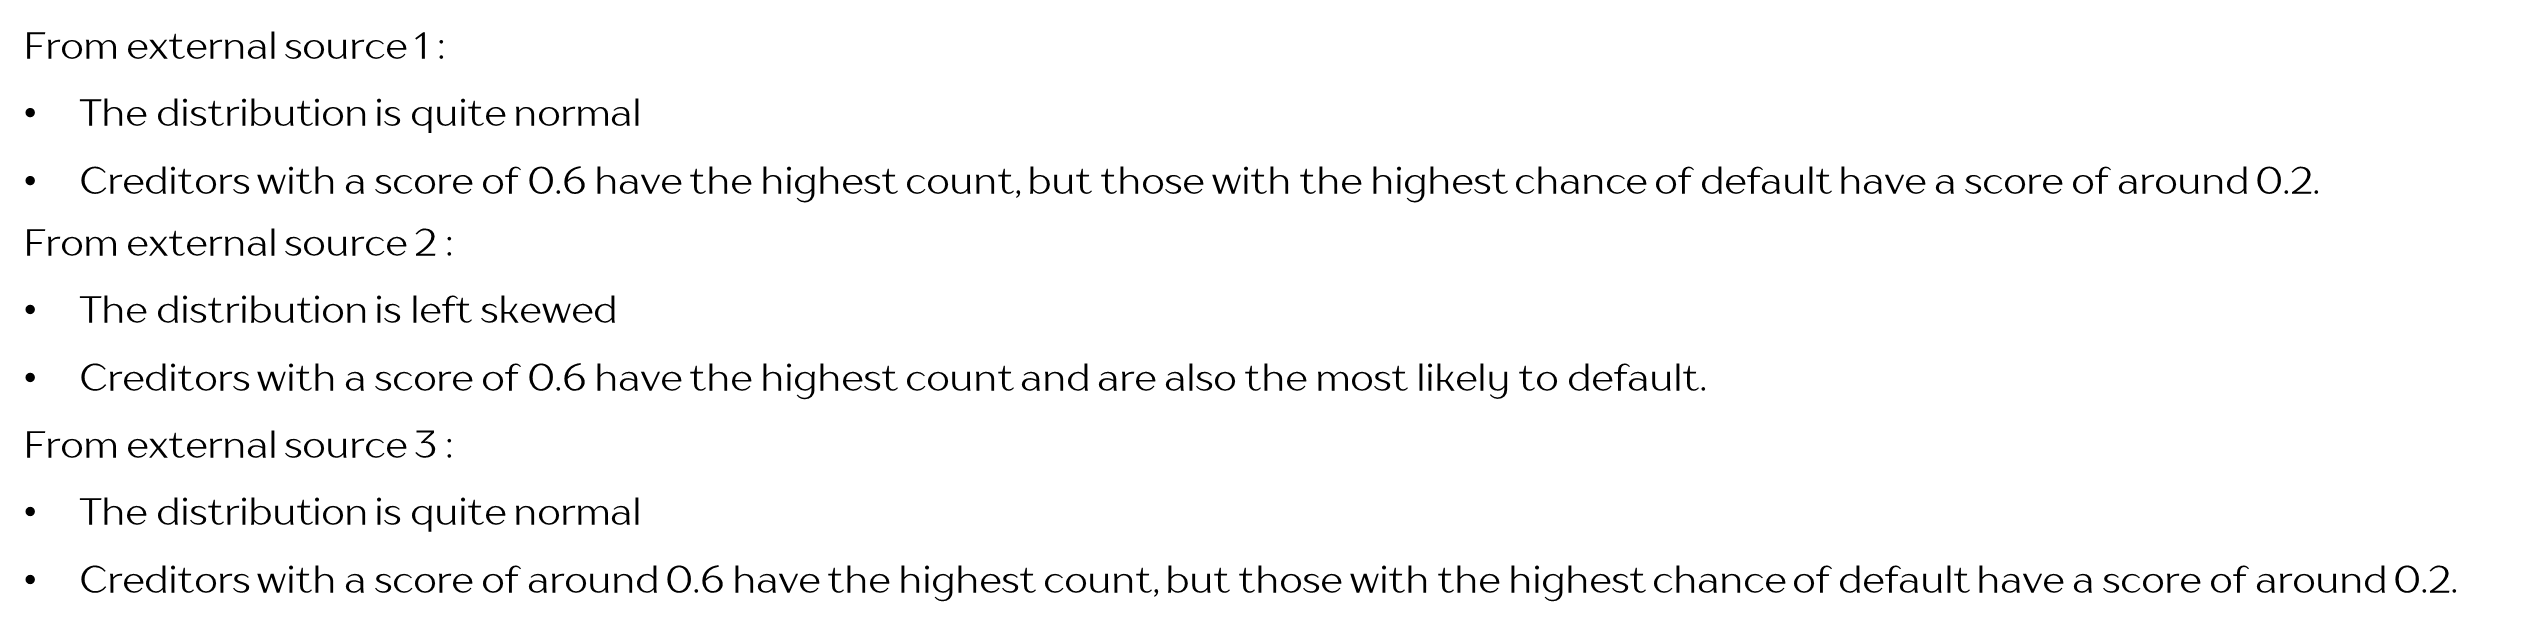

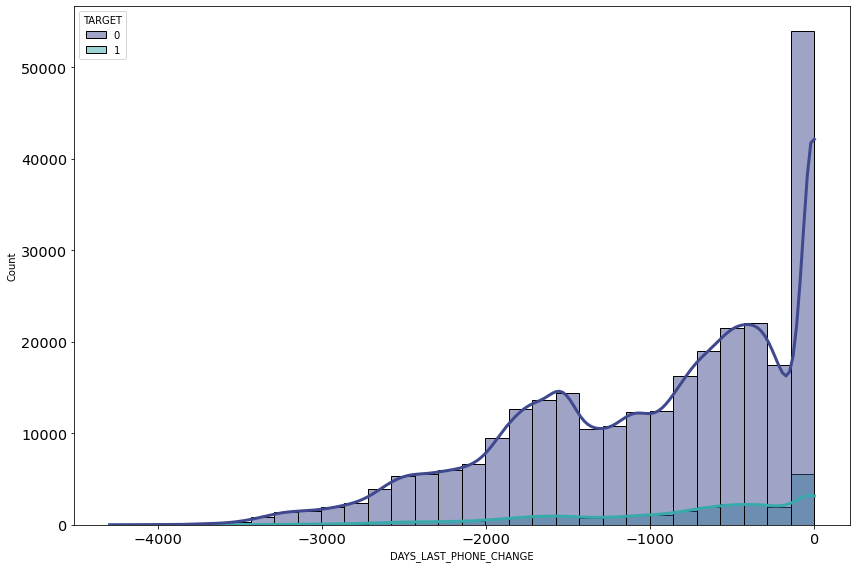

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(x=df1['DAYS_LAST_PHONE_CHANGE'],data=df1,hue=df1['TARGET'],bins=30,palette='mako',kde=True)
plt.tight_layout()
plt.savefig('phone change.png',dpi='figure',transparent=True)

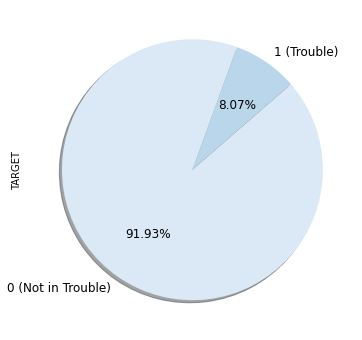

In [24]:
plt.figure(figsize=(6,6))

colors = sns.color_palette("Blues")
labels ="0 (Not in Trouble)", "1 (Trouble)"

df1["TARGET"].value_counts().plot.pie(autopct='%1.2f%%', shadow=True,labels = labels ,colors=colors, fontsize=12, startangle=70)
plt.savefig('target_percent.png',dpi=200,transparent=True)

<AxesSubplot:>

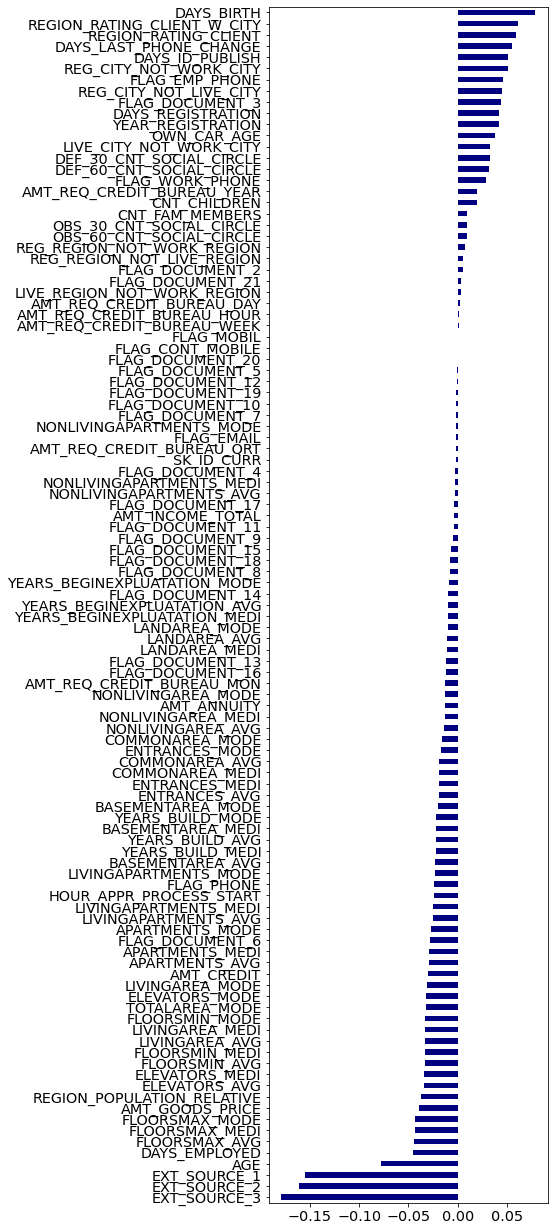

In [25]:
plt.figure(figsize=(5,22))
df1.corr()['TARGET'].sort_values()[:-1].plot(kind='barh',color='navy')

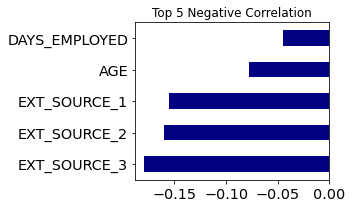

In [26]:
plt.figure(figsize=(5,3))
df1.corr()['TARGET'].sort_values()[:5].plot(kind='barh',color='navy')
plt.title('Top 5 Negative Correlation')
plt.tight_layout()
plt.savefig('top 5 negative.png',dpi='figure',transparent=True)

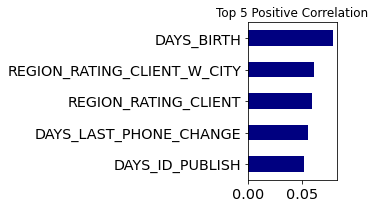

In [27]:
plt.figure(figsize=(5,3))
df1.corr()['TARGET'].sort_values()[-6:-1].plot(kind='barh',color='navy')
plt.title('Top 5 Positive Correlation')
plt.tight_layout()
plt.savefig('top 5 positive.png',dpi='figure',transparent=True)

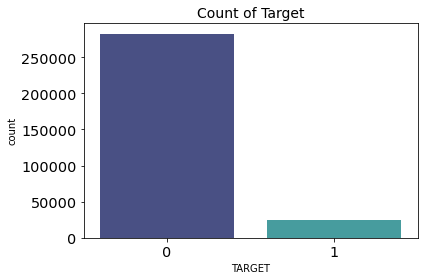

In [28]:
sns.countplot(x=df1['TARGET'],palette='mako')
plt.title('Count of Target',size=14)
plt.tight_layout()
plt.savefig('Count of Target.png',dpi='figure',transparent=True)

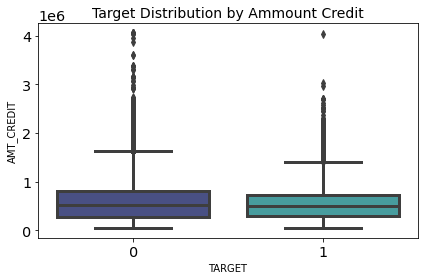

In [29]:
sns.boxplot(x=df1['TARGET'],y=df1['AMT_CREDIT'],palette='mako')
plt.title('Target Distribution by Ammount Credit',size=14)
plt.tight_layout()
plt.savefig('Target Distribution by amount credit.png',dpi='figure',transparent=True)

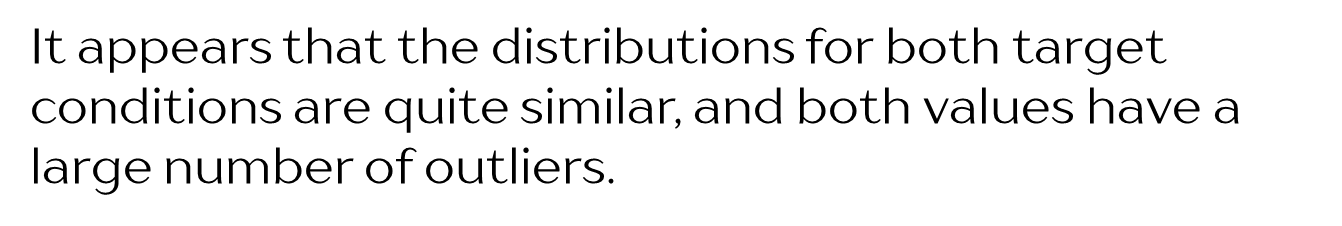

In [30]:
df1['AMT_CREDIT'].groupby(df1['TARGET']).describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,282686.0,602648.282002,406845.907710,45000.0,270000.0,517788.0,810000.0,4050000.0
1,24825.0,557778.527674,346433.235646,45000.0,284400.0,497520.0,733315.5,4027680.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\3362963607.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


<Figure size 864x576 with 0 Axes>

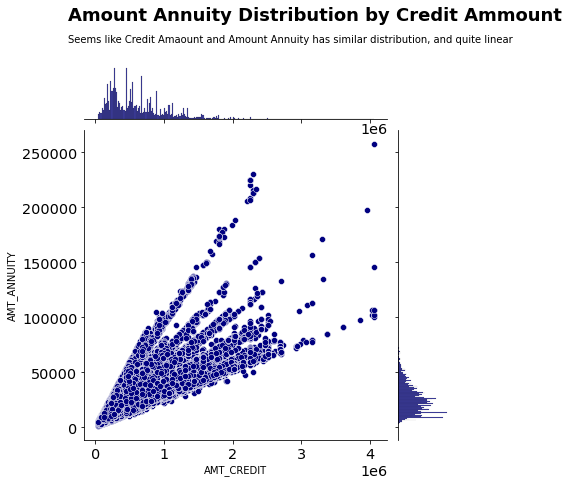

In [31]:
plt.figure(figsize=(12,8))
sns.jointplot(x=df1['AMT_CREDIT'],y=df1['AMT_ANNUITY'],data=df1,color='navy')
plt.text(x=-60000,y=370000,s='Amount Annuity Distribution by Credit Ammount',size=18,fontweight='bold')
plt.text(x=-60000,y=350000,s='Seems like Credit Amaount and Amount Annuity has similar distribution, and quite linear',size=10)
plt.tight_layout()
plt.savefig('annuity vs credit.png',dpi='figure',transparent=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


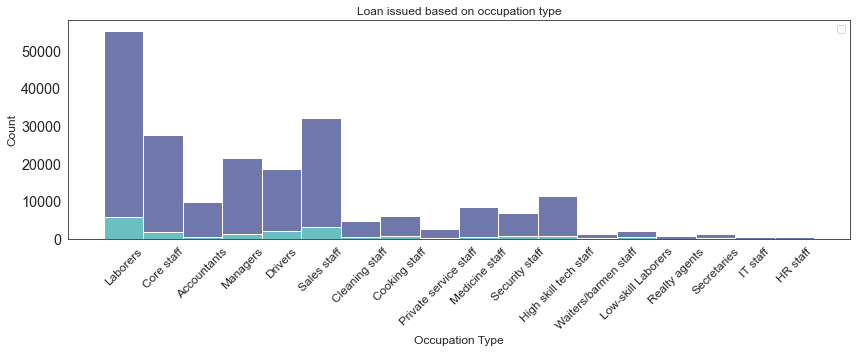

In [32]:
sns.set_style('white')
plt.figure(figsize=(12,5))
sns.histplot(x=df1['OCCUPATION_TYPE'],hue=df1['TARGET'], palette='mako',multiple='stack')
plt.title('Loan issued based on occupation type')
plt.xlabel('Occupation Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper right')
plt.xticks(size=12,rotation=45)
plt.tight_layout()
plt.savefig('occupation vs target.png',dpi='figure',transparent=True)
plt.show()

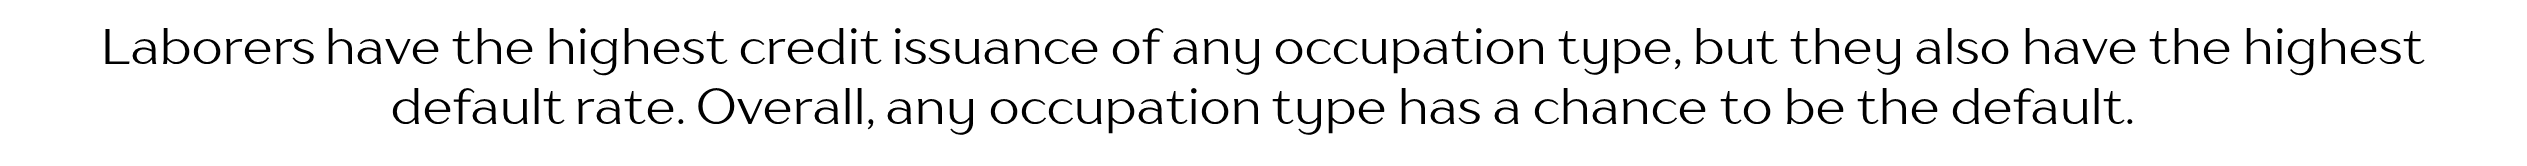

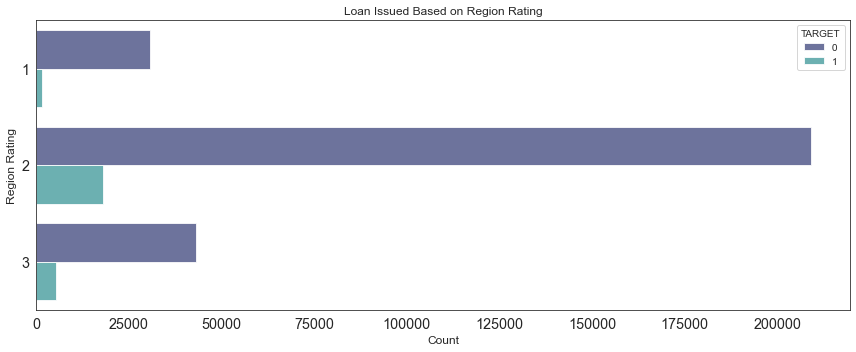

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(y=df1['REGION_RATING_CLIENT'],hue=df1['TARGET'], alpha=0.8,palette='mako')
plt.title('Loan Issued Based on Region Rating')
plt.ylabel('Region Rating', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('region rating vs target.png',dpi='figure',transparent=True)
plt.show()

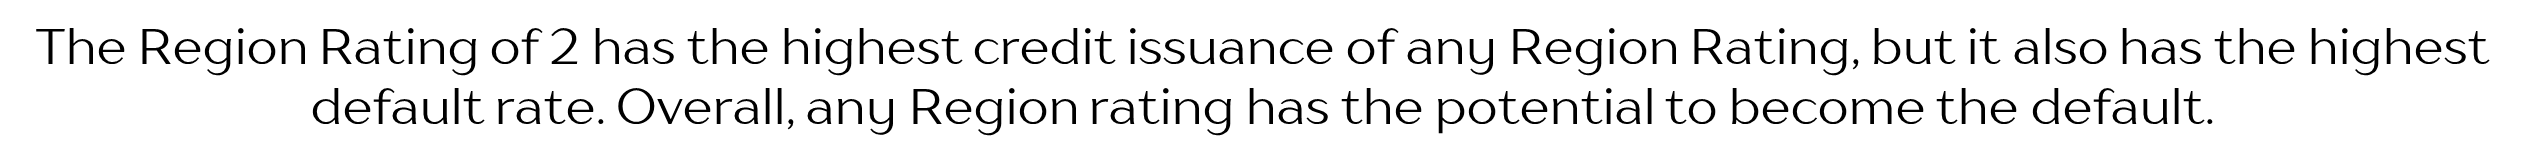

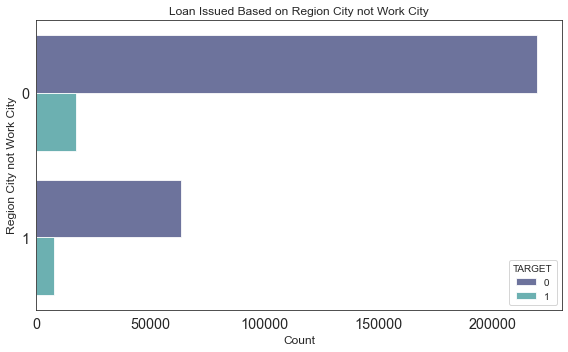

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(y=df1['REG_CITY_NOT_WORK_CITY'],hue=df1['TARGET'], alpha=0.8,palette='mako')
plt.title('Loan Issued Based on Region City not Work City')
plt.ylabel('Region City not Work City', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('reg city not work vs target.png',dpi='figure',transparent=True)
plt.show()

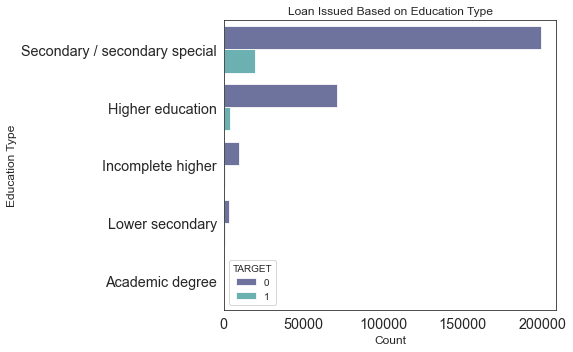

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(y=df1['NAME_EDUCATION_TYPE'],hue=df1['TARGET'], alpha=0.8,palette='mako',order = df1['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Loan Issued Based on Education Type')
plt.ylabel('Education Type', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('education vs target.png',dpi='figure',transparent=True)
plt.show()

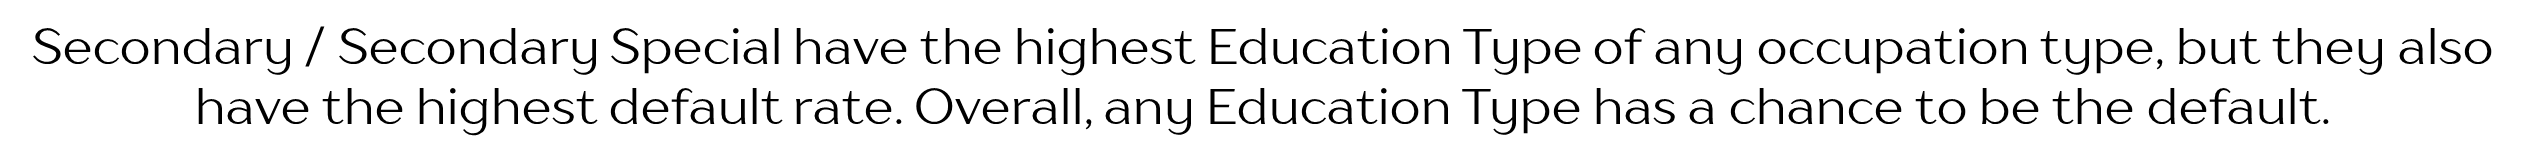

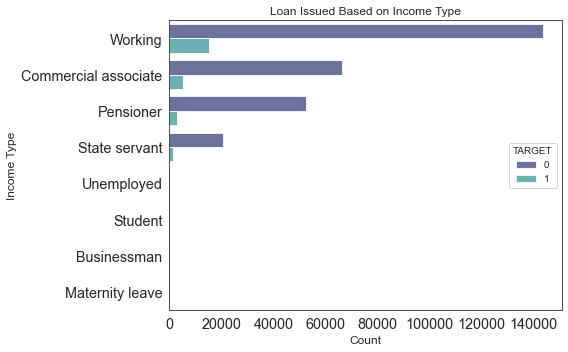

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(y=df1['NAME_INCOME_TYPE'],hue=df1['TARGET'], alpha=0.8,palette='mako',order = df1['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Loan Issued Based on Income Type')
plt.ylabel('Income Type', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('income type vs target.png',dpi='figure',transparent=True)
plt.show()

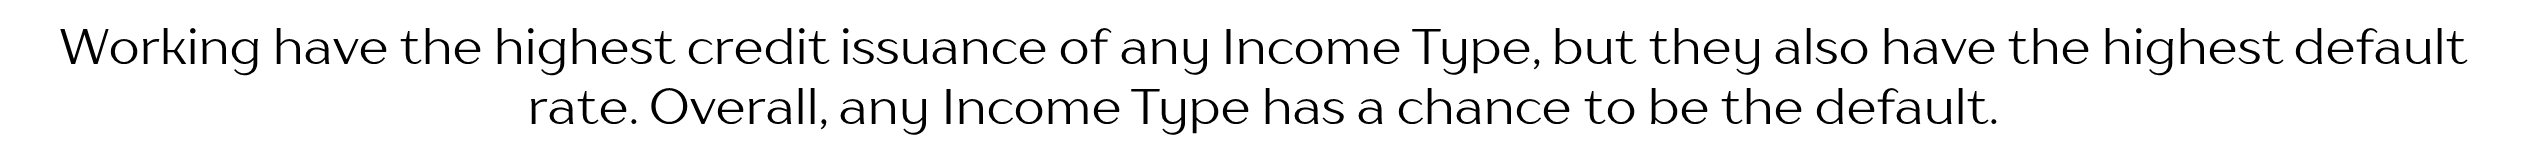

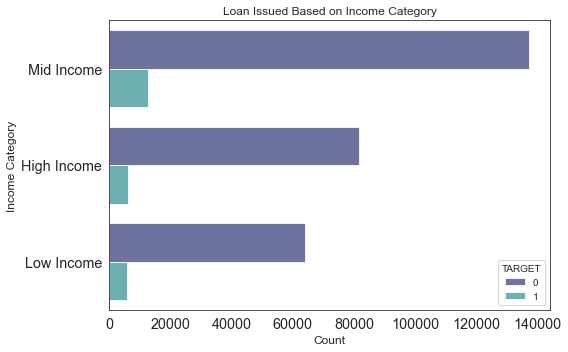

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(y=df1['AMT_INCOME_CAT'],hue=df1['TARGET'], alpha=0.8,palette='mako',order = df1['AMT_INCOME_CAT'].value_counts().index)
plt.title('Loan Issued Based on Income Category')
plt.ylabel('Income Category', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('income cat vs target.png',dpi='figure',transparent=True)
plt.show()

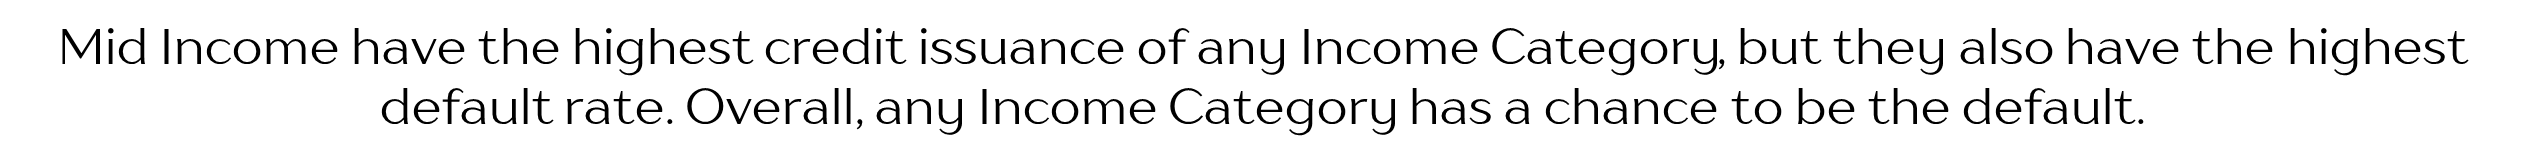

<Figure size 864x576 with 0 Axes>

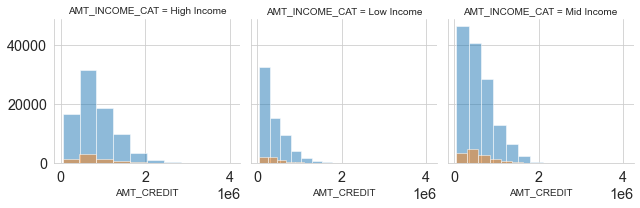

In [38]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
g = sns.FacetGrid(col='AMT_INCOME_CAT',hue='TARGET',data=df1)
g.map(plt.hist,'AMT_CREDIT',alpha=0.5,bins=10)
plt.tight_layout()
plt.savefig('amt income vs target.png',dpi='figure',transparent=True)
plt.tight_layout()

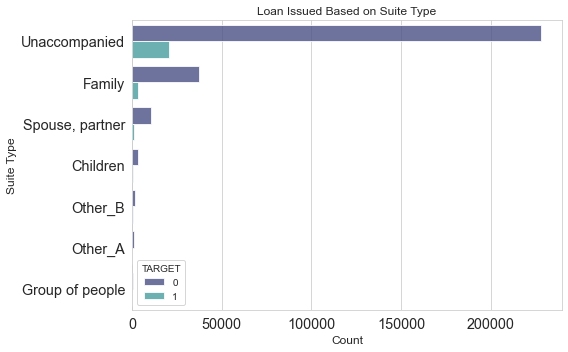

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(y=df1['NAME_TYPE_SUITE'],hue=df1['TARGET'], alpha=0.8,palette='mako',order = df1['NAME_TYPE_SUITE'].value_counts().index)
plt.title('Loan Issued Based on Suite Type')
plt.ylabel('Suite Type', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('suit type vs target.png',dpi='figure',transparent=True)
plt.show()

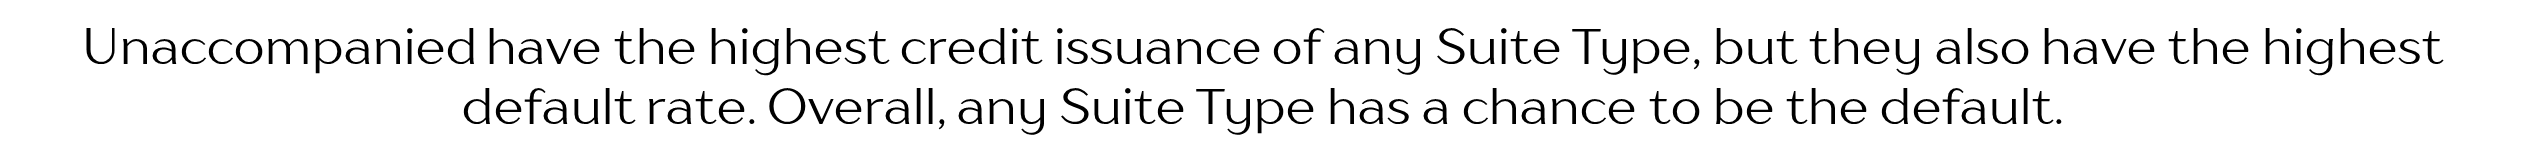

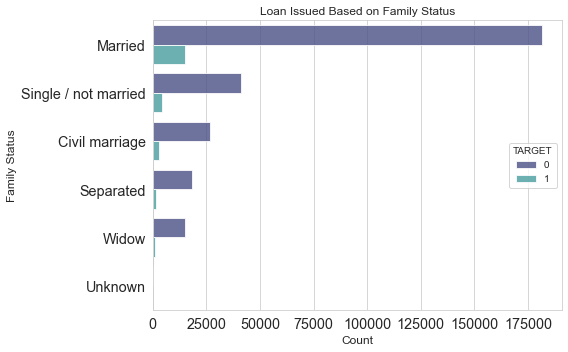

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(y=df1['NAME_FAMILY_STATUS'],hue=df1['TARGET'], alpha=0.8,palette='mako',order = df1['NAME_FAMILY_STATUS'].value_counts().index)
plt.title('Loan Issued Based on Family Status')
plt.ylabel('Family Status', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('fam status vs target.png',dpi='figure',transparent=True)
plt.show()

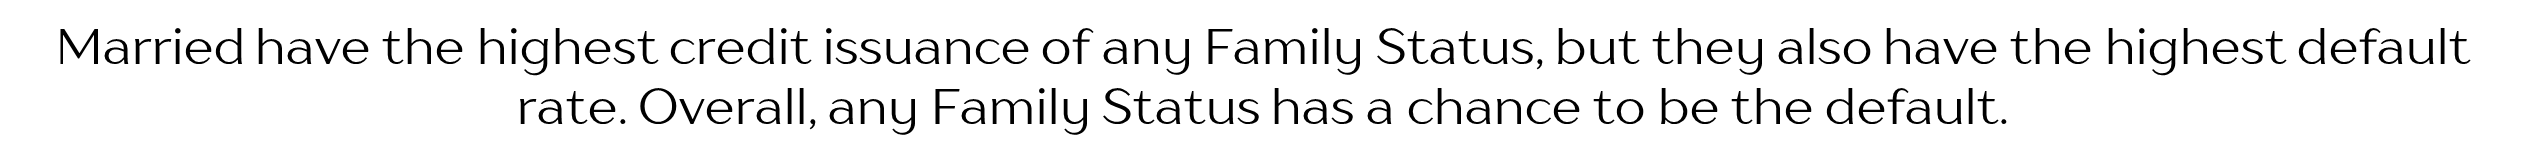

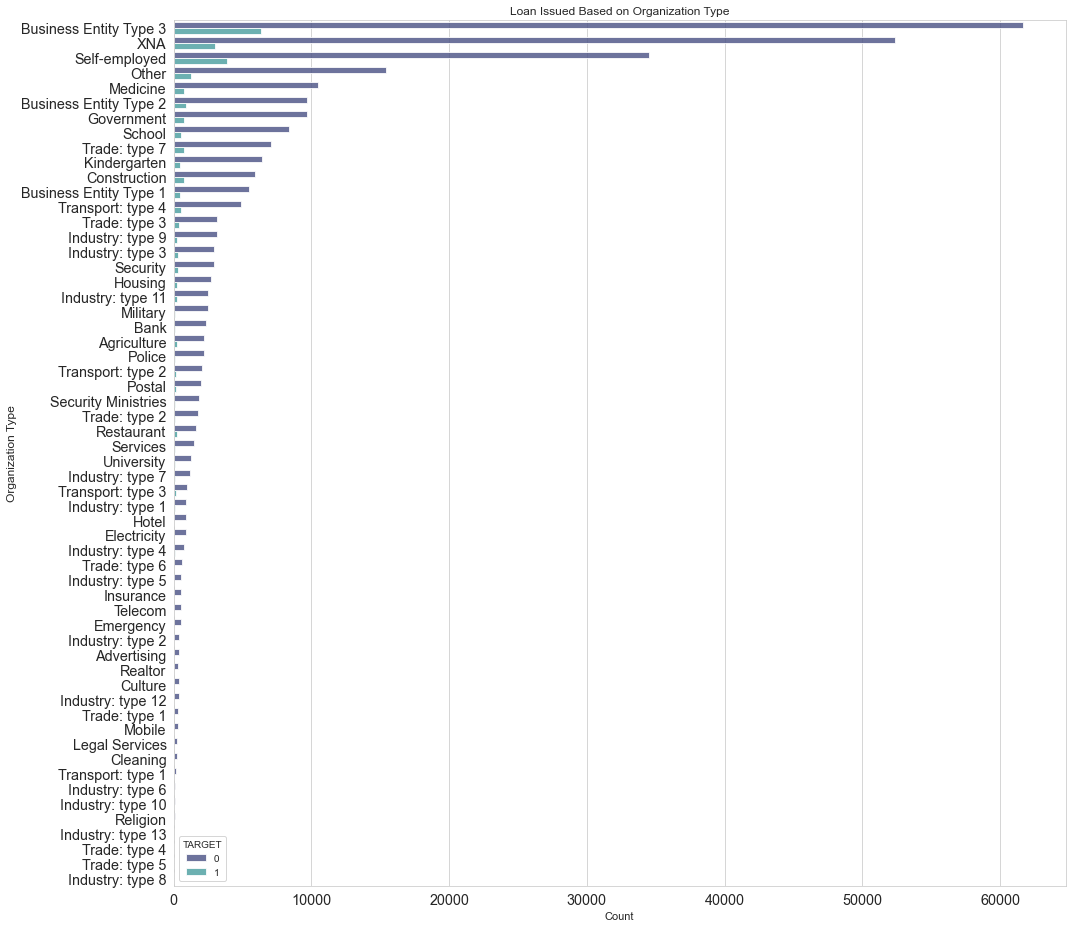

In [41]:
plt.figure(figsize=(15,13))
sns.countplot(y=df1['ORGANIZATION_TYPE'],hue=df1['TARGET'], alpha=0.8,palette='mako',order = df1['ORGANIZATION_TYPE'].value_counts().index)
plt.title('Loan Issued Based on Organization Type')
plt.ylabel('Organization Type', fontsize=12)
plt.xlabel('Count', fontsize=11)
plt.tight_layout()
plt.savefig('organization type vs target.png',dpi='figure',transparent=True)
plt.show()

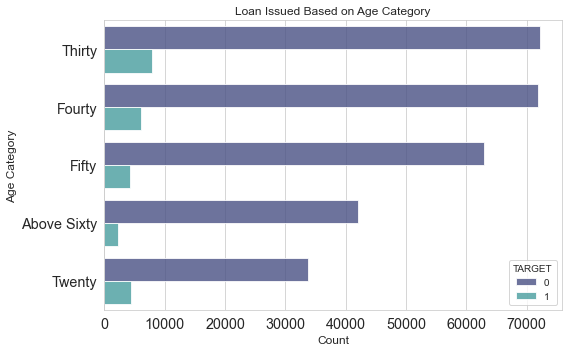

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(y=df1['AGE_CATEGORY'],hue=df1['TARGET'], alpha=0.8,palette='mako',order = df1['AGE_CATEGORY'].value_counts().index)
plt.title('Loan Issued Based on Age Category')
plt.ylabel('Age Category', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('age cat vs target.png',dpi='figure',transparent=True)
plt.show()

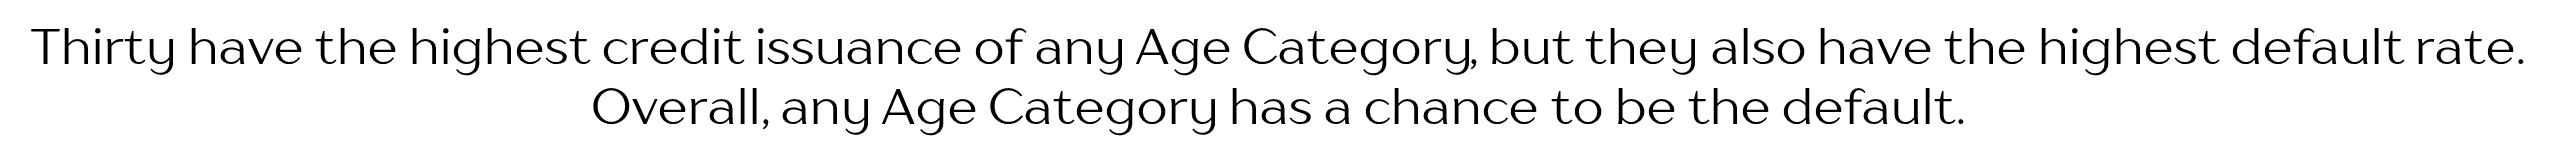

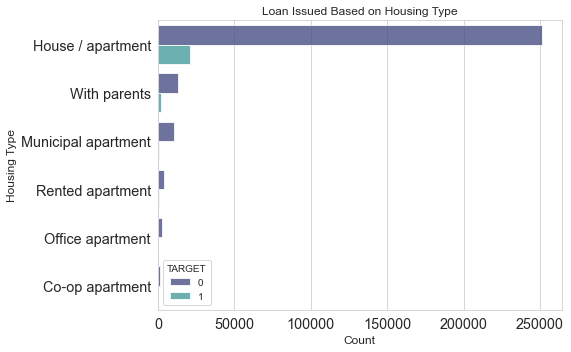

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(y=df1['NAME_HOUSING_TYPE'],hue=df1['TARGET'], alpha=0.8,palette='mako',order = df1['NAME_HOUSING_TYPE'].value_counts().index)
plt.title('Loan Issued Based on Housing Type')
plt.ylabel('Housing Type', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('housing type vs target.png',dpi='figure',transparent=True)
plt.show()

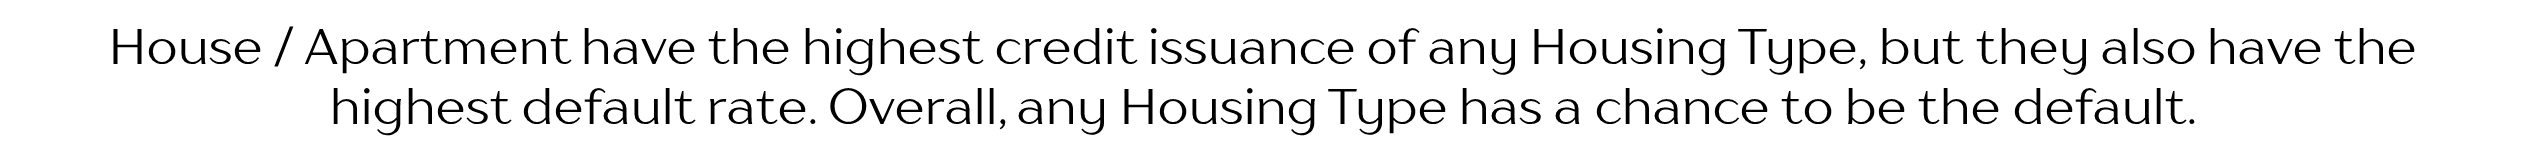

In [44]:
df1['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


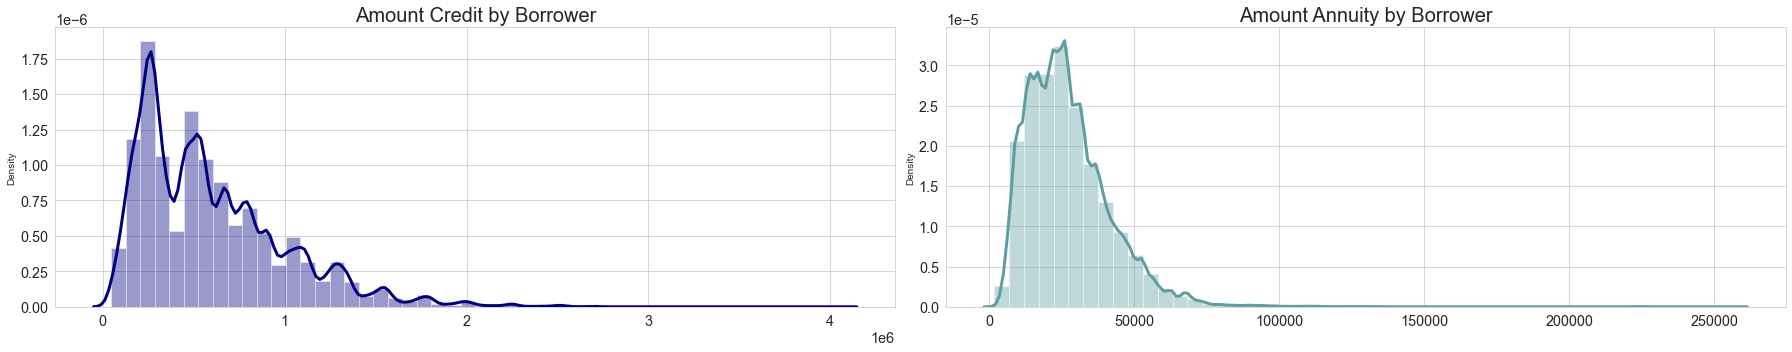

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.distplot(df1['AMT_CREDIT'].values, ax=ax[0],color='navy')
ax[0].set_title('Amount Credit by Borrower',size=20)
sns.distplot(df1['AMT_ANNUITY'].values, ax=ax[1],color='cadetblue')
ax[1].set_title('Amount Annuity by Borrower',size=20)
plt.tight_layout()
plt.savefig('amount annuity amount credit.png',dpi='figure',transparent=True)

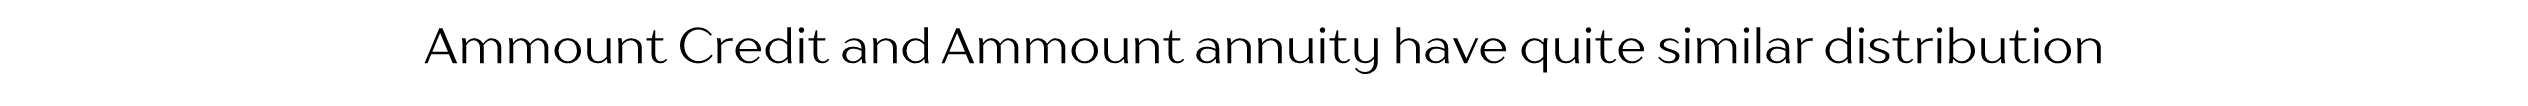

### Average Loan Amount Issued per Year

C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


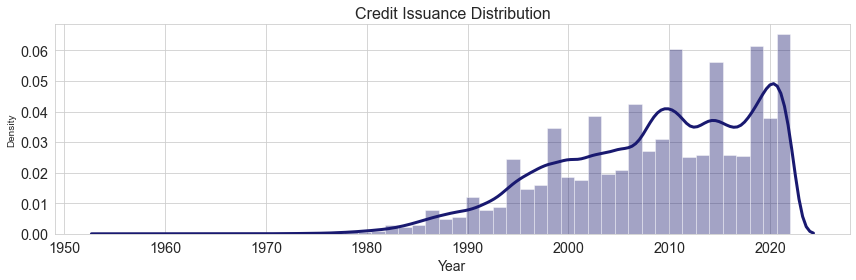

In [46]:
plt.figure(figsize=(12,4))
sns.distplot(df1['YEAR_REGISTRATION'].values, color='midnightblue')
plt.title('Credit Issuance Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('year reg.png',dpi='figure',transparent=True)

C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


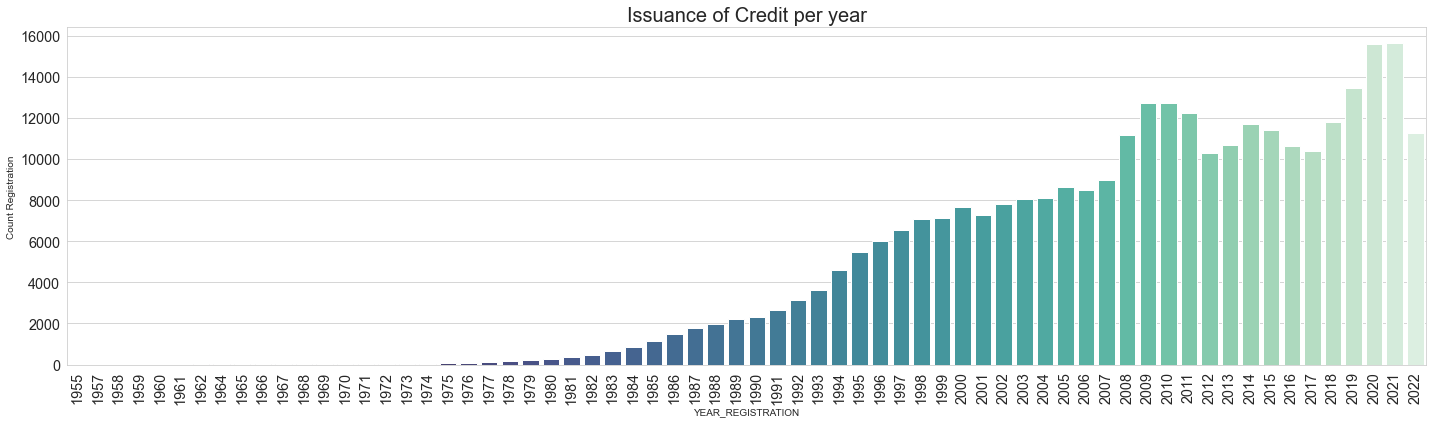

In [47]:
plt.figure(figsize=(20,6))
result = df1.groupby(['YEAR_REGISTRATION']).size()
x = result.index
y = result.values
ax = sns.barplot(x, y, order=x,palette='mako')
ax.set(xlabel='YEAR_REGISTRATION', ylabel='Count Registration')
ax.set_title('Issuance of Credit per year', size=20)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.savefig('issuance credit.png',dpi='figure',transparent=True)
plt.show()

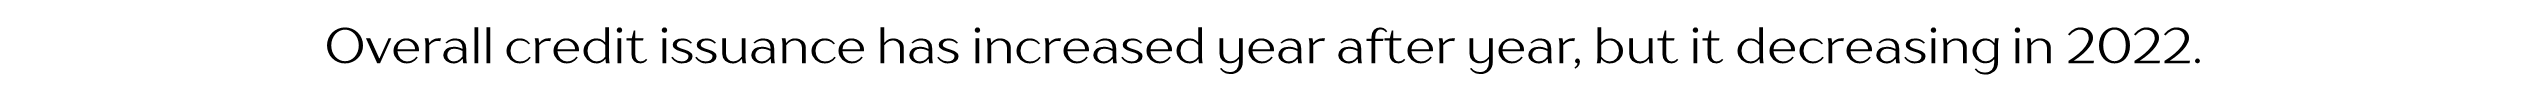

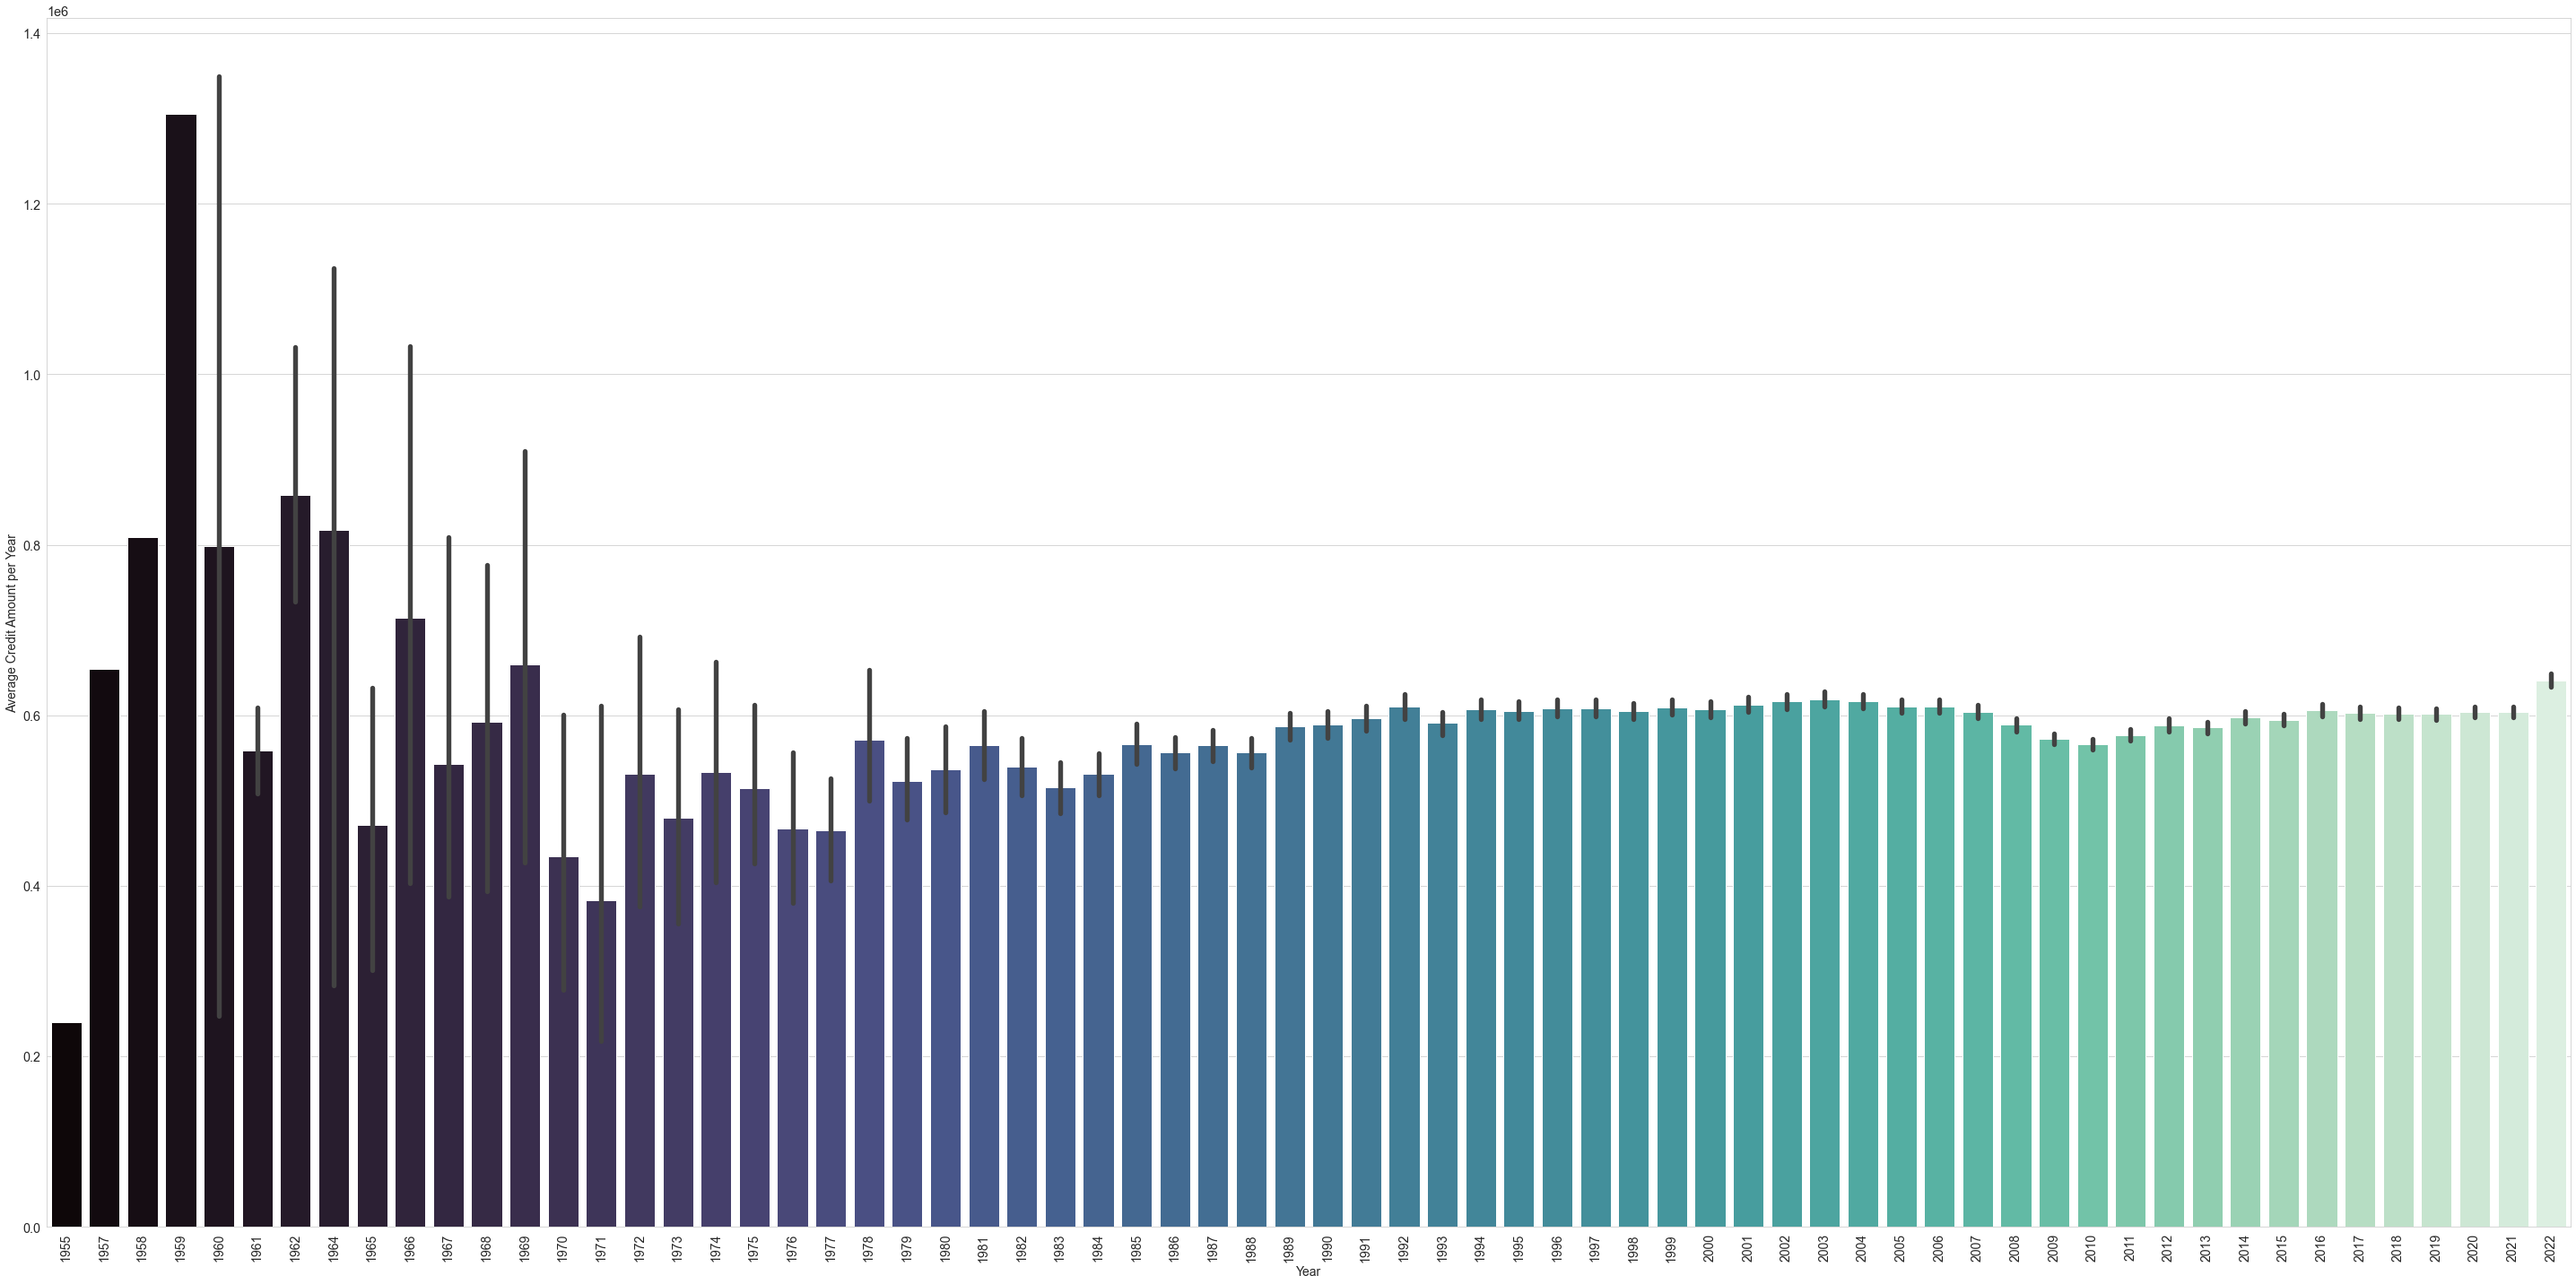

In [ ]:
plt.figure(figsize=(40,20))
sns.barplot(x='YEAR_REGISTRATION',y='AMT_CREDIT', data=df1, palette='mako')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Credit Amount per Year', fontsize=14)
plt.xticks(size=14, rotation=90)
plt.tight_layout()
plt.savefig('year.png',dpi=fig.dpi,transparent=True)

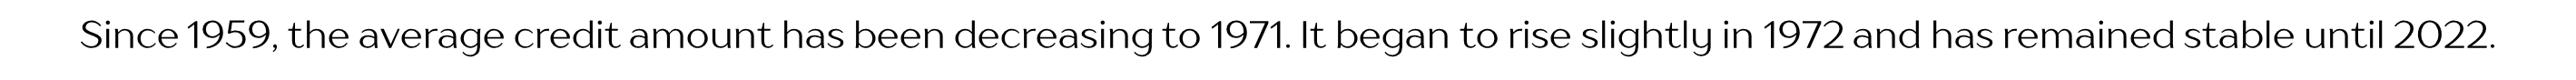

In [49]:
df1.corr()['TARGET']['DAYS_LAST_PHONE_CHANGE']

0.055218483513459246

# Data Preprocessing

## Define Missing Value

In [50]:
def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(df1)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df1.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [51]:
missing_values_train = missing_values_table(df1)
missing_values_train.head(10)

Your selected dataframe has 127 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [52]:
df1.info(verbose=True,null_counts=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\3964841342.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df1.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 127 columns):
 #    Column                        Non-Null Count   Dtype         
---   ------                        --------------   -----         
 0    SK_ID_CURR                    307511 non-null  int64         
 1    TARGET                        307511 non-null  int64         
 2    NAME_CONTRACT_TYPE            307511 non-null  object        
 3    CODE_GENDER                   307511 non-null  object        
 4    FLAG_OWN_CAR                  307511 non-null  object        
 5    FLAG_OWN_REALTY               307511 non-null  object        
 6    CNT_CHILDREN                  307511 non-null  int64         
 7    AMT_INCOME_TOTAL              307511 non-null  float64       
 8    AMT_CREDIT                    307511 non-null  float64       
 9    AMT_ANNUITY                   307499 non-null  float64       
 10   AMT_GOODS_PRICE               307233 non-null  float64       
 11 

## Drop Columns with High Percentage Missing Value and Not Correlated to Target

In [53]:
df1 = df1.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG'], axis = 1)

In [54]:
df1.info(verbose=True, null_counts=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\95206278.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df1.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 117 columns):
 #    Column                        Non-Null Count   Dtype         
---   ------                        --------------   -----         
 0    SK_ID_CURR                    307511 non-null  int64         
 1    TARGET                        307511 non-null  int64         
 2    NAME_CONTRACT_TYPE            307511 non-null  object        
 3    CODE_GENDER                   307511 non-null  object        
 4    FLAG_OWN_CAR                  307511 non-null  object        
 5    FLAG_OWN_REALTY               307511 non-null  object        
 6    CNT_CHILDREN                  307511 non-null  int64         
 7    AMT_INCOME_TOTAL              307511 non-null  float64       
 8    AMT_CREDIT                    307511 non-null  float64       
 9    AMT_ANNUITY                   307499 non-null  float64       
 10   AMT_GOODS_PRICE               307233 non-null  float64       
 11 

## Imputation for Null/NaN Values

In [55]:
nums = [key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['float64', 'int64']]
cats = [key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['object']]

In [56]:
data_numeric = df1[nums]
data_categorical = pd.DataFrame(df1[cats])


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median', verbose=0)
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns

cimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)
data_categorical = pd.DataFrame(cimp.fit_transform(data_categorical), columns = data_categorical.columns) #only apply imputer to numeric columns

df1 = pd.concat([data_numeric, data_categorical], axis = 1)

C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\sklearn\impute\_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\sklearn\impute\_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import array 

In [58]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [59]:
df_model = df1.copy()

## Feature Encoding

In [60]:
nums = [key for key in dict(df_model.dtypes) if dict(df_model.dtypes)[key] in ['float64', 'int64']]
cats_le = df_model[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','EMERGENCYSTATE_MODE','NAME_EDUCATION_TYPE','AMT_INCOME_CAT']]
cats_ohe = df_model[['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY','NAME_HOUSING_TYPE']]

In [61]:
for i in cats_le:
    df_model[i]= LabelEncoder().fit_transform(df_model[i])
for cat in cats_ohe:
    onehots = pd.get_dummies(df_model[cat], prefix=cat)
    df_model = df_model.join(onehots)

In [62]:
df_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 241 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                float64
 1    TARGET                                    float64
 2    CNT_CHILDREN                              float64
 3    AMT_INCOME_TOTAL                          float64
 4    AMT_CREDIT                                float64
 5    AMT_ANNUITY                               float64
 6    AMT_GOODS_PRICE                           float64
 7    REGION_POPULATION_RELATIVE                float64
 8    DAYS_BIRTH                                float64
 9    DAYS_EMPLOYED                             float64
 10   DAYS_REGISTRATION                         float64
 11   DAYS_ID_PUBLISH                           float64
 12   OWN_CAR_AGE                               float64
 13   FLAG_MOBIL                                

In [63]:
df_model = df_model.drop(['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY','NAME_HOUSING_TYPE'], axis=1)

## Feature Selection

In [64]:
X = df_model[[col for col in df_model.columns if col not in ['TARGET']]]
y = df_model['TARGET']
 
print("Feature data dimension: ", X.shape) 

Feature data dimension:  (307511, 230)


In [65]:
select = SelectKBest(score_func=f_regression, k=15)
z = select.fit_transform(X, y) 
 
print("After selecting best 15 features:", z.shape) 

After selecting best 15 features: (307511, 15)


In [66]:
filter = select.get_support()
features = array(X.columns)
 
print("All features:")
print(' ')
print(features)
print(' ')
print(' ')
print("Selected best 15:")
print(' ')
print(features[filter])
print(z) 

All features:
 
['SK_ID_CURR' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY'
 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE'
 'FLAG_MOBIL' 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE'
 'FLAG_PHONE' 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'ELEVATORS_AVG'
 'ENTRANCES_AVG' 'FLOORSMAX_AVG' 'FLOORSMIN_AVG' 'LANDAREA_AVG'
 'LIVINGAREA_AVG' 'NONLIVINGAREA_AVG' 'APARTMENTS_MODE'
 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BUILD_MODE'
 'ELEVATORS_MODE' 'ENTRANCES_MODE' 'FLOORSMAX_MODE' 'FLOORSMIN_MODE'
 'LANDAREA_M

le : 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','EMERGENCYSTATE_MODE','NAME_EDUCATION_TYPE','AMT_INCOME_CAT'
ohe : 'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY'
oe : 'NAME_EDUCATION_TYPE','AMT_INCOME_CAT'

In [67]:
numss = [['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEAR_REGISTRATION',
 'AGE']]

## Normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler
for i in numss:
    df_model[i] = MinMaxScaler().fit_transform(df_model[i])

In [69]:
df_model[nums].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_REGISTRATION,AGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.500146,0.080729,0.021950,0.001224,0.138334,0.099423,0.124159,0.284944,0.518151,0.213300,...,0.000507,0.000335,0.001385,0.000673,0.003715,0.008566,0.000880,0.071139,0.798403,0.480553
std,0.288531,0.272419,0.038006,0.002027,0.100497,0.056525,0.092103,0.191521,0.245997,0.368717,...,0.022518,0.018299,0.019504,0.011449,0.023841,0.031734,0.002851,0.070621,0.144042,0.247458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250225,0.000000,0.000000,0.000742,0.056180,0.058143,0.049383,0.134537,0.312683,0.039545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.701493,0.265306
50%,0.500206,0.000000,0.000000,0.001039,0.116987,0.090821,0.102132,0.257000,0.534329,0.043583,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.820896,0.469388
75%,0.749862,0.000000,0.052632,0.001512,0.190674,0.128624,0.159371,0.392880,0.722435,0.045994,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.925373,0.693878
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling, Evaluation, & Tuning Hyperparameter

## Modeling

In [70]:
#import library for modelling

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn import over_sampling

In [71]:
X1 = df_model[['DAYS_BIRTH','DAYS_ID_PUBLISH','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AGE','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_Working','AGE_CATEGORY_Twenty']]
y1 = df_model['TARGET']
X1, y1 = over_sampling.SMOTE(0.5).fit_resample(X1, y1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


## Evaluation

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, zero_division=0))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, zero_division=0))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, zero_division=0))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred, zero_division=0))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train, zero_division=0))

    print('Test score:' + str(model.score(X_test, y_test))) #Test score
    print('Train score: ' + str(model.score(X_train, y_train))) #Train score

    print("AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [73]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=42,)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [74]:
eval_classification(log_model)

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.71
Precision (Test Set): 0.61
Precision (Train Set): 0.61
Recall (Test Set): 0.36
Recall (Train Set): 0.36
F1-Score (Test Set): 0.45
F1-Score (Train Set): 0.45
Test score:0.709635324544647
Train score: 0.7108786469914427
AUC (Test Set): 0.73
AUC (Train Set): 0.73
[[75174  9602]
 [27335 15098]]



## Tuning Hyperparameter

In [75]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters
penalty = ['l2','l1','elasticnet']
C = [0.00001,0.00002,0.00003,0.0001,0.0002,0.0003, 0.001, 0.002,0.003] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['lbfgs','liblinear','newton-cg','sag','saga']
# max_iter = [100, 1000,2500, 5000]
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres with Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=10, random_state=42, scoring='accuracy')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model)

C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search fai

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.71
Precision (Test Set): 0.63
Precision (Train Set): 0.62
Recall (Test Set): 0.32
Recall (Train Set): 0.32
F1-Score (Test Set): 0.43
F1-Score (Train Set): 0.43
Test score:0.7099419066261035
Train score: 0.7096455764436359
AUC (Test Set): 0.73
AUC (Train Set): 0.73
[[76610  8166]
 [28732 13701]]



In [76]:
y_pred_train = model.predict(X_train)
print("Precision (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

Precision (Train Set): 0.71


In [77]:
print('Best penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.002


In [78]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.7096455764436359
Test score:0.7099419066261035


In [79]:
log_model_tuned = LogisticRegression(penalty='l2', C=0.002,random_state=42)
log_model_tuned.fit(X_train, y_train)
eval_classification(log_model_tuned)

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.71
Precision (Test Set): 0.63
Precision (Train Set): 0.62
Recall (Test Set): 0.32
Recall (Train Set): 0.32
F1-Score (Test Set): 0.43
F1-Score (Train Set): 0.43
Test score:0.7099419066261035
Train score: 0.7096455764436359
AUC (Test Set): 0.73
AUC (Train Set): 0.73
[[76610  8166]
 [28732 13701]]



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\1613931705.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(importances['Attribute'], y=importances['Attribute'])


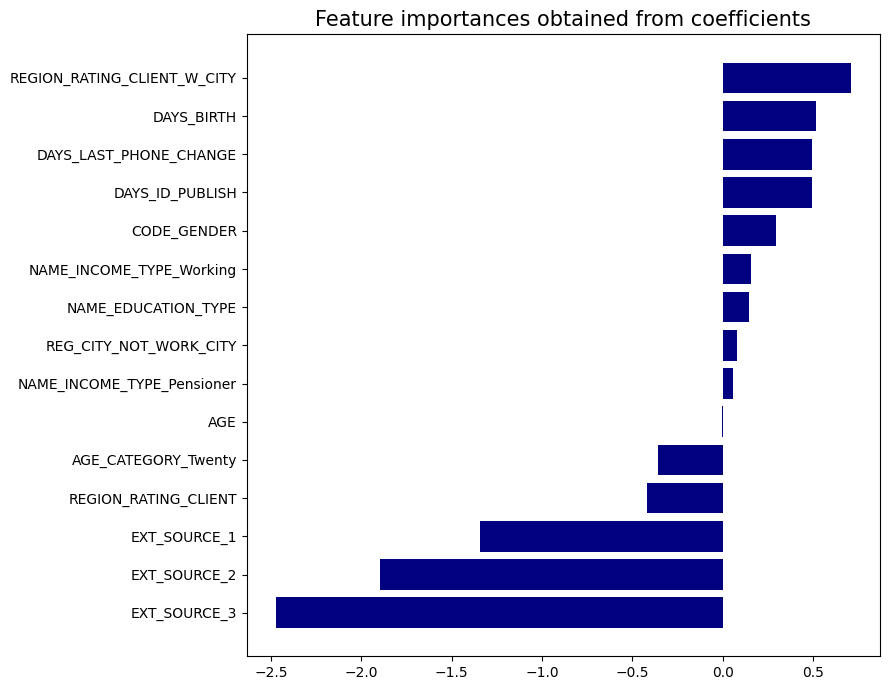

In [80]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(9,7))

plt.title('Feature importances obtained from coefficients', size=15)

ax.barh(importances['Attribute'], importances['Importance'], align='center',color='navy')
ax.set_yticklabels(importances['Attribute'], y=importances['Attribute'])
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('feature importance.png',dpi='figure',transparent=True)
plt.show()

In [81]:
y_pred_proba1 = model.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba1, columns=['y_pred_proba1'])], axis=1)
df_actual_predicted.index = y_test.index

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

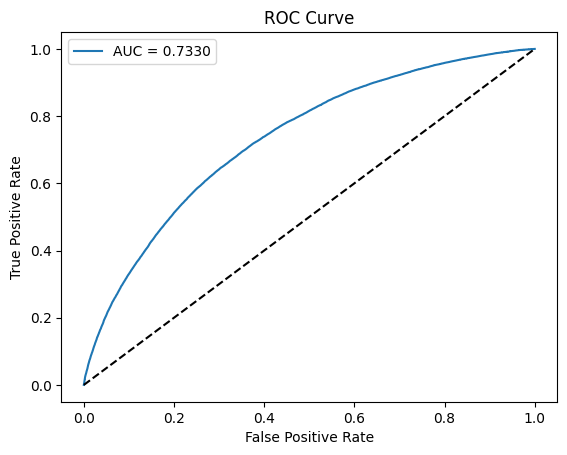

In [83]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba1'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba1'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [84]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba1')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3434')

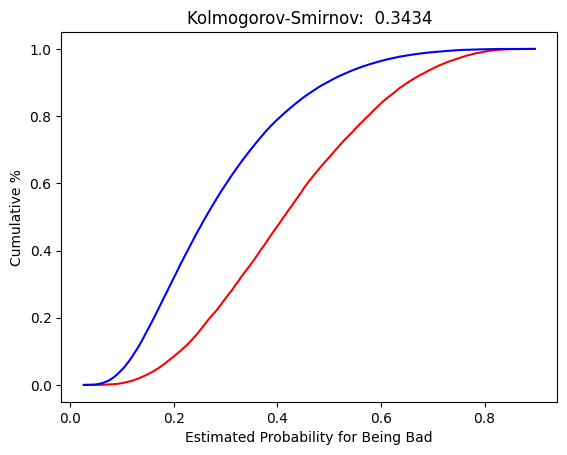

In [85]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba1'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba1'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

# Predict Data Test

In [86]:
df_test = pd.read_csv('C:/Users/LENOVO/Downloads/CV KERJA/[Trilaksono Buwono Subiantoro]_VIX_Home Credit/Dataset/application_test.csv')

In [87]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Extracting REGISTRATION DATE and YEAR REGISTRATION

In [88]:
df_test['DAYS_REGISTRATION'].value_counts()

-818.0      20
-427.0      19
-991.0      18
-3758.0     16
-223.0      15
            ..
-13801.0     1
-12726.0     1
-11996.0     1
-13139.0     1
-12088.0     1
Name: DAYS_REGISTRATION, Length: 12618, dtype: int64

In [89]:
df_test['DATE_REGISTRATION'] = pd.to_datetime("today") + pd.to_timedelta(df_test['DAYS_REGISTRATION'], unit='D')

In [90]:
df_test['DATE_REGISTRATION'].head()

0   2008-06-28 17:29:52.507176
1   1997-09-06 17:29:52.507176
2   2016-09-09 17:29:52.507176
3   2017-03-03 17:29:52.507176
4   2011-09-11 17:29:52.507176
Name: DATE_REGISTRATION, dtype: datetime64[ns]

In [91]:
df_test['YEAR_REGISTRATION'] = pd.DatetimeIndex(df_test['DATE_REGISTRATION']).year

In [92]:
df_test['YEAR_REGISTRATION'].head()

0    2008
1    1997
2    2016
3    2017
4    2011
Name: YEAR_REGISTRATION, dtype: int64

### Extract Age and Grouping Age by Category

In [93]:
df_test['DAYS_BIRTH'].head()

0   -19241
1   -18064
2   -20038
3   -13976
4   -13040
Name: DAYS_BIRTH, dtype: int64

In [94]:
df_test['AGE'] = df_test['DAYS_BIRTH']/-360
decimals = 0
df_test['AGE'] = df_test['AGE'].apply(lambda x: round(x, decimals))

print(f'''Min value Age Column:''')
print(df_test['AGE'].min())

print(f'''Max value Age Column:''')
print(df_test['AGE'].max())

print(f'''Value count Age Column:''')
print(df_test['AGE'].value_counts())

Min value Age Column:
20.0
Max value Age Column:
70.0
Value count Age Column:
38.0    1430
40.0    1427
43.0    1365
39.0    1357
41.0    1340
42.0    1333
32.0    1307
33.0    1287
36.0    1284
44.0    1281
29.0    1278
45.0    1240
28.0    1238
37.0    1229
35.0    1220
34.0    1215
47.0    1204
46.0    1202
30.0    1196
31.0    1164
53.0    1130
48.0    1128
49.0    1116
50.0    1115
54.0    1092
55.0    1086
56.0    1075
57.0    1065
51.0    1055
52.0    1039
58.0    1035
60.0     967
61.0     960
62.0     956
59.0     943
63.0     877
64.0     864
65.0     811
27.0     707
23.0     612
25.0     604
26.0     598
24.0     598
66.0     588
67.0     447
68.0     361
69.0     180
22.0     120
70.0      10
21.0       6
20.0       2
Name: AGE, dtype: int64


In [95]:
def age_category(age):
    if age < 20:
        return 'Late Ten'
    elif age >= 20 and age < 30:
        return 'Twenty'
    elif age >= 30 and age < 40:
        return 'Thirty'
    elif age >= 40 and age < 50:
        return 'Fourty'
    elif age >= 50 and age < 60:
        return 'Fifty'
    else:
        return 'Above Sixty'

df_test['AGE_CATEGORY'] = df_test['AGE'].apply(age_category)

In [96]:
print(f'''Min value Age Category Column:''')
print(df_test['AGE_CATEGORY'].min())

print(f'''Max value Age Category Column:''')
print(df_test['AGE_CATEGORY'].max())

print(f'''Value count Age Column:''')
print(df_test['AGE_CATEGORY'].value_counts())

Min value Age Category Column:
Above Sixty
Max value Age Category Column:
Twenty
Value count Age Column:
Thirty         12689
Fourty         12636
Fifty          10635
Above Sixty     7021
Twenty          5763
Name: AGE_CATEGORY, dtype: int64


### Grouping Income Category into LOW, MID and HIGH

In [97]:
df_test['AMT_INCOME_TOTAL'].describe()

count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [98]:
def income_category(income):
    if income < 112500:
        return 'Low Income'
    elif income >= 112500 and income < 202500:
        return 'Mid Income'
    else:
        return 'High Income'

df_test['AMT_INCOME_CAT'] = df_test['AMT_INCOME_TOTAL'].apply(income_category)

In [99]:
df_test['AMT_INCOME_CAT'].value_counts()

Mid Income     24030
High Income    16110
Low Income      8604
Name: AMT_INCOME_CAT, dtype: int64

In [100]:
def missing_values_table(df_test):
        # Total missing values
        mis_val = df1.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(df_test)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df_test.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [101]:
missing_values_train = missing_values_table(df_test)
missing_values_train.head(10)

Your selected dataframe has 126 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [102]:
df_test.info(verbose=True,null_counts=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\2229585848.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_test.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 126 columns):
 #    Column                        Non-Null Count  Dtype         
---   ------                        --------------  -----         
 0    SK_ID_CURR                    48744 non-null  int64         
 1    NAME_CONTRACT_TYPE            48744 non-null  object        
 2    CODE_GENDER                   48744 non-null  object        
 3    FLAG_OWN_CAR                  48744 non-null  object        
 4    FLAG_OWN_REALTY               48744 non-null  object        
 5    CNT_CHILDREN                  48744 non-null  int64         
 6    AMT_INCOME_TOTAL              48744 non-null  float64       
 7    AMT_CREDIT                    48744 non-null  float64       
 8    AMT_ANNUITY                   48720 non-null  float64       
 9    AMT_GOODS_PRICE               48744 non-null  float64       
 10   NAME_TYPE_SUITE               47833 non-null  object        
 11   NAME_INCOME_T

In [103]:
df_test = df_test.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG'], axis = 1)

In [104]:
df_test.info(verbose=True, null_counts=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23204\4018911552.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_test.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 116 columns):
 #    Column                        Non-Null Count  Dtype         
---   ------                        --------------  -----         
 0    SK_ID_CURR                    48744 non-null  int64         
 1    NAME_CONTRACT_TYPE            48744 non-null  object        
 2    CODE_GENDER                   48744 non-null  object        
 3    FLAG_OWN_CAR                  48744 non-null  object        
 4    FLAG_OWN_REALTY               48744 non-null  object        
 5    CNT_CHILDREN                  48744 non-null  int64         
 6    AMT_INCOME_TOTAL              48744 non-null  float64       
 7    AMT_CREDIT                    48744 non-null  float64       
 8    AMT_ANNUITY                   48720 non-null  float64       
 9    AMT_GOODS_PRICE               48744 non-null  float64       
 10   NAME_TYPE_SUITE               47833 non-null  object        
 11   NAME_INCOME_T

In [105]:
nums2 = [key for key in dict(df_test.dtypes) if dict(df_test.dtypes)[key] in ['float64', 'int64']]
cats2 = [key for key in dict(df_test.dtypes) if dict(df_test.dtypes)[key] in ['object']]

In [106]:
#create two DataFrames, one for each data type
data_numeric_test = df_test[nums2]
data_categorical_test = pd.DataFrame(df_test[cats2])


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median', verbose=0)
data_numeric_test = pd.DataFrame(imp.fit_transform(data_numeric_test), columns = data_numeric_test.columns) #only apply imputer to numeric columns

cimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)
data_categorical_test = pd.DataFrame(cimp.fit_transform(data_categorical_test), columns = data_categorical_test.columns) #only apply imputer to numeric columns
data_categorical_test

#you could do something like one-hot-encoding of data_categorical here

#join the two masked dataframes back together
df_test = pd.concat([data_numeric_test, data_categorical_test], axis = 1)

C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\sklearn\impute\_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
C:\Users\LENOVO\anaconda3\envs\machinelearning\lib\site-packages\sklearn\impute\_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [107]:
df_test_model = df_test

In [108]:
nums_test = [key for key in dict(df_test_model.dtypes) if dict(df_test_model.dtypes)[key] in ['float64', 'int64']]
cats_le_test = df_test_model[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','EMERGENCYSTATE_MODE','NAME_EDUCATION_TYPE','AMT_INCOME_CAT']]
cats_ohe_test = df_test_model[['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY','NAME_HOUSING_TYPE']]

In [109]:
for i in cats_le_test:
    df_test_model[i]= LabelEncoder().fit_transform(df_test_model[i])
for cat in cats_ohe_test:
    onehots = pd.get_dummies(df_test_model[cat], prefix=cat)
    df_test_model = df_test_model.join(onehots)

In [110]:
df_test_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 238 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                float64
 1    CNT_CHILDREN                              float64
 2    AMT_INCOME_TOTAL                          float64
 3    AMT_CREDIT                                float64
 4    AMT_ANNUITY                               float64
 5    AMT_GOODS_PRICE                           float64
 6    REGION_POPULATION_RELATIVE                float64
 7    DAYS_BIRTH                                float64
 8    DAYS_EMPLOYED                             float64
 9    DAYS_REGISTRATION                         float64
 10   DAYS_ID_PUBLISH                           float64
 11   OWN_CAR_AGE                               float64
 12   FLAG_MOBIL                                float64
 13   FLAG_EMP_PHONE                            fl

In [111]:
df_test_model = df_test_model.drop(['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','AGE_CATEGORY','NAME_HOUSING_TYPE'], axis=1)

In [112]:
numss_test = [['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEAR_REGISTRATION',
 'AGE']]

In [113]:
for i in numss_test:
    df_test_model[i] = MinMaxScaler().fit_transform(df_test_model[i])

In [114]:
X2 = df_test_model[['DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AGE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Working', 'AGE_CATEGORY_Twenty']]

In [115]:
X2

,DAYS_BIRTH,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,AGE_CATEGORY_Twenty
0,0.333427,0.872086,0.5,0.75,0.0,0.798495,0.923572,0.180263,0.601009,0.66,0,1,0,1,0
1,0.399339,0.744329,0.5,0.75,0.0,0.595809,0.341111,0.490287,1.000000,0.60,1,4,0,1,0
2,0.288794,0.448173,0.5,0.75,0.0,0.532916,0.818463,0.692134,0.803715,0.72,1,1,0,1,0
3,0.628269,0.337114,0.5,0.75,0.0,0.553401,0.596110,0.694076,0.586104,0.38,0,4,0,1,0
4,0.680685,0.328607,0.5,0.75,1.0,0.203835,0.497875,0.587946,0.811740,0.32,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.292602,0.464556,1.0,1.00,0.0,0.532916,0.758565,0.728454,0.843155,0.70,0,4,0,1,0
48740,0.784510,0.526938,0.5,0.75,1.0,0.532916,0.800695,0.587946,1.000000,0.22,0,4,0,0,0
48741,0.519292,0.763075,0.5,0.75,0.0,0.777850,0.740079,0.321070,0.807842,0.48,0,4,0,0,0
48742,0.628717,0.785129,0.5,0.75,1.0,0.388503,0.521283,0.674520,0.470764,0.38,1,1,0,0,0


In [116]:
TARGET = pd.Series(model.predict(X2), name="Target")

In [117]:
ID = df_test_model['SK_ID_CURR']
submission_test = pd.concat([ID, TARGET], axis=1)

In [118]:
submission_test

,SK_ID_CURR,Target
0,0.000000,0.0
1,0.000011,1.0
2,0.000034,0.0
3,0.000076,0.0
4,0.000104,1.0
...,...,...
48739,0.999919,0.0
48740,0.999921,0.0
48741,0.999924,0.0
48742,0.999927,0.0


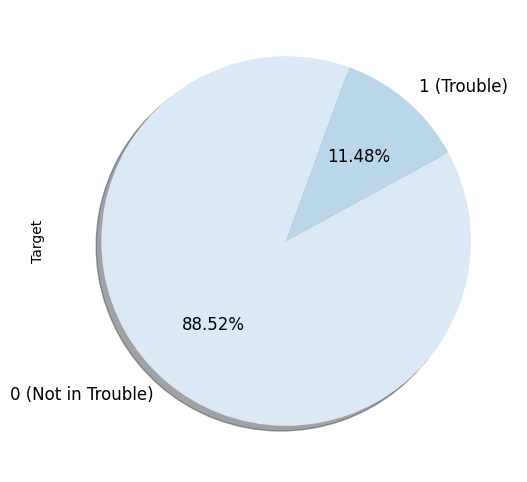

In [119]:
plt.figure(figsize=(6,6))

colors = sns.color_palette("Blues")
labels ="0 (Not in Trouble)", "1 (Trouble)"

submission_test["Target"].value_counts().plot.pie(autopct='%1.2f%%', shadow=True,labels = labels ,colors=colors, fontsize=12, startangle=70)
plt.savefig('submission_test.png',dpi=200,transparent=True)

In [120]:
#Submission
submission_test.to_csv('submissions_hci_datatest.csv',index=False)